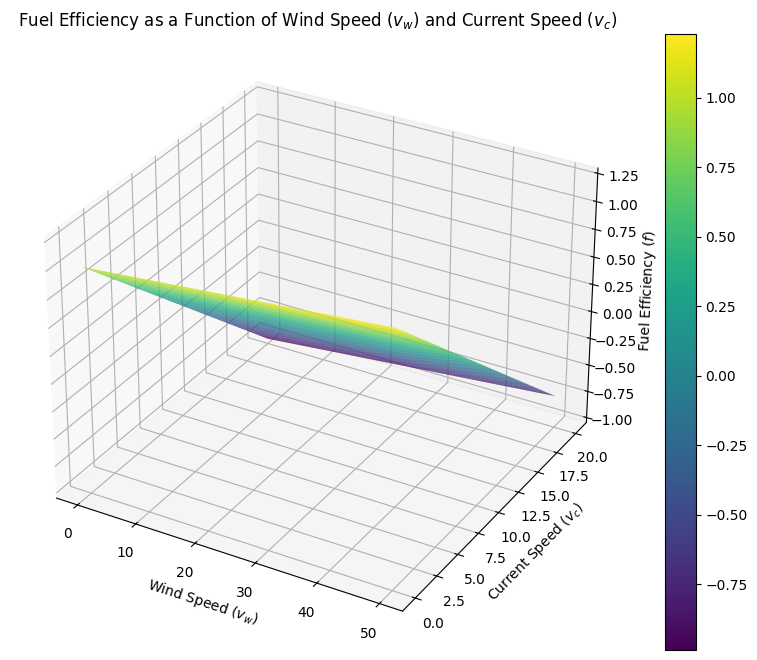

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 연비 효율 함수 정의
def fuel_efficiency(v_w, theta_w, v_c, theta_c):
    return 1 + 0.005 * v_w * np.cos(theta_w) - 0.1 * v_c * np.cos(theta_c)

# 고정 변수 설정
theta_w = 0  # 바람 방향 각도 고정 (라디안)
theta_c = 0  # 조류 방향 각도 고정 (라디안)

# 풍속(v_w)와 조류 속도(v_c) 범위 설정
v_w_values = np.linspace(0, 50, 100)  # 풍속 0~50
v_c_values = np.linspace(0, 20, 100)  # 조류 속도 0~20

# 메시 그리드 생성
V_w, V_c = np.meshgrid(v_w_values, v_c_values)

# f 값 계산
F = fuel_efficiency(V_w, theta_w, V_c, theta_c)

# 3D 그래프 그리기
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(V_w, V_c, F, cmap='viridis')

# 축 라벨 설정
ax.set_xlabel('Wind Speed ($v_w$)')
ax.set_ylabel('Current Speed ($v_c$)')
ax.set_zlabel('Fuel Efficiency ($f$)')
ax.set_title('Fuel Efficiency as a Function of Wind Speed ($v_w$) and Current Speed ($v_c$)')

# 컬러바 추가
fig.colorbar(surf)

plt.show()

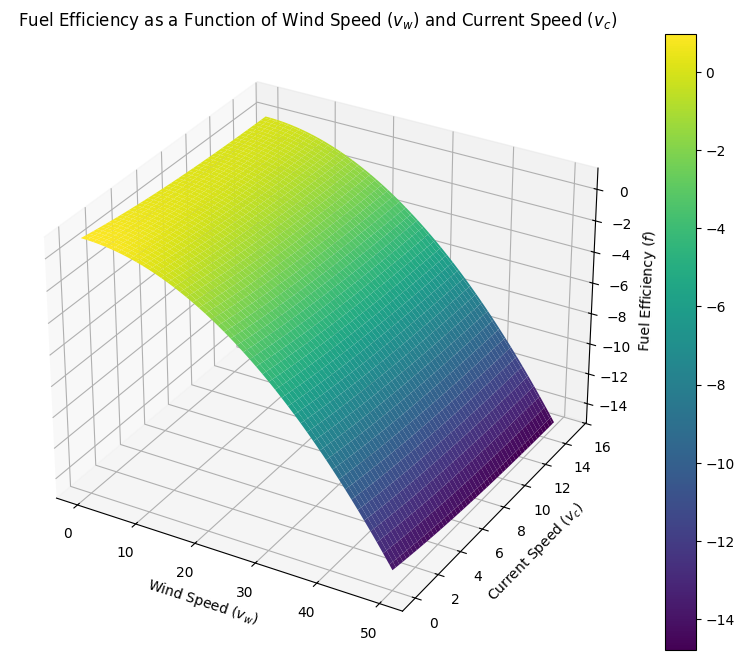

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 연비 효율 함수 정의
def fuel_efficiency(V_s, v_c, theta_c, v_w, theta_w, f_0, k_w):
    relative_speed_term = ((V_s - v_c * np.cos(theta_c)) / V_s) ** 3
    wind_term = k_w * v_w ** 2 * np.cos(theta_w)
    return f_0 * relative_speed_term + wind_term

# 고정 변수 설정
V_s = 20  # 선박 속도 (기준 속도)
f_0 = 1  # 기준 연비 효율
k_w = 0.01  # 바람 영향 계수
theta_w = 180  # 바람 방향 각도 고정 (라디안)
theta_c = 0  # 조류 방향 각도 고정 (라디안)

# 풍속(v_w)와 조류 속도(v_c) 범위 설정
v_w_values = np.linspace(0, 50, 100)  # 풍속 0~50
v_c_values = np.linspace(0, 15, 100)  # 조류 속도 0~15 (V_s보다 작게 설정)

# 메시 그리드 생성
V_w, V_c = np.meshgrid(v_w_values, v_c_values)

# f 값 계산
F = fuel_efficiency(V_s, V_c, theta_c, V_w, theta_w, f_0, k_w)

# 3D 그래프 그리기
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(V_w, V_c, F, cmap='viridis')

# 축 라벨 설정
ax.set_xlabel('Wind Speed ($v_w$)')
ax.set_ylabel('Current Speed ($v_c$)')
ax.set_zlabel('Fuel Efficiency ($f$)')
ax.set_title('Fuel Efficiency as a Function of Wind Speed ($v_w$) and Current Speed ($v_c$)')

# 컬러바 추가
fig.colorbar(surf)

plt.show()

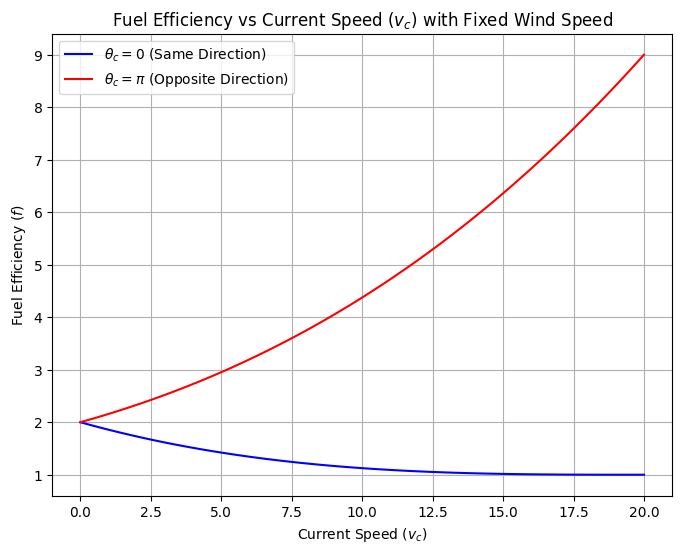

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 연비 효율 함수 정의
def fuel_efficiency(V_s, v_c, theta_c, v_w, theta_w, f_0, k_w):
    relative_speed_term = ((V_s - v_c * np.cos(theta_c)) / V_s) ** 3
    wind_term = k_w * v_w ** 2 * np.cos(theta_w)
    return f_0 * relative_speed_term + wind_term

# 고정 변수 설정
V_s = 20  # 선박 속도 (기준 속도)
f_0 = 1  # 기준 연비 효율
k_w = 0.01  # 바람 영향 계수
v_w = 10  # 풍속 고정
theta_w = 0  # 바람 방향 각도 고정 (라디안)
theta_c = 0  # 조류 방향 각도 고정 (라디안, 같은 방향)

# 조류 속도(v_c) 범위 설정
v_c_values = np.linspace(0, V_s, 100)  # 조류 속도 0~V_s (상대 속도가 음수가 되지 않도록 제한)

# 결과를 저장할 리스트
f_values_same_direction = []

# v_c에 따른 f 계산 (조류가 선박과 같은 방향)
for v_c in v_c_values:
    f = fuel_efficiency(V_s, v_c, theta_c, v_w, theta_w, f_0, k_w)
    f_values_same_direction.append(f)

# 조류가 반대 방향일 때 (theta_c = pi)
theta_c_opposite = np.pi
f_values_opposite_direction = []
for v_c in v_c_values:
    f = fuel_efficiency(V_s, v_c, theta_c_opposite, v_w, theta_w, f_0, k_w)
    f_values_opposite_direction.append(f)

# 2D 그래프 그리기
plt.figure(figsize=(8, 6))
plt.plot(v_c_values, f_values_same_direction, label=r'$\theta_c = 0$ (Same Direction)', color='b')
plt.plot(v_c_values, f_values_opposite_direction, label=r'$\theta_c = \pi$ (Opposite Direction)', color='r')
plt.xlabel('Current Speed ($v_c$)')
plt.ylabel('Fuel Efficiency ($f$)')
plt.title('Fuel Efficiency vs Current Speed ($v_c$) with Fixed Wind Speed')
plt.grid(True)
plt.legend()
plt.show()